## F6.keras_classification_wine (Multi class problem)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import keras

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Class', axis=1).values)
y = df['Class'].values

In [10]:
X[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

In [11]:
y[:5]

array([1, 1, 1, 1, 1])

In [12]:
y_cat = pd.get_dummies(y)

In [13]:
y_cat[:5]

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
X.shape, y_cat.shape

((178, 13), (178, 3))

In [20]:
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Dense
import keras.backend as K

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [24]:
K.clear_session()

model = Sequential()
model.add(Dense(5, activation='relu', input_dim=13, kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/10
113/113 [==============================] - 0s 301us/step - loss: 0.5768 - acc: 0.6460 - val_loss: 0.5212 - val_acc: 0.6552
Epoch 2/10
113/113 [==============================] - 0s 247us/step - loss: 0.4883 - acc: 0.6726 - val_loss: 0.5110 - val_acc: 0.6552
Epoch 3/10
113/113 [==============================] - 0s 470us/step - loss: 0.4815 - acc: 0.6903 - val_loss: 0.5155 - val_acc: 0.6552
Epoch 4/10
113/113 [==============================] - 0s 914us/step - loss: 0.5364 - acc: 0.6283 - val_loss: 0.5024 - val_acc: 0.6897
Epoch 5/10
113/113 [==============================] - 0s 611us/step - loss: 0.4600 - acc: 0.7257 - val_loss: 0.6351 - val_acc: 0.6552
Epoch 6/10
113/113 [==============================] - 0s 680us/step - loss: 0.5332 - acc: 0.5752 - val_loss: 0.5021 - val_acc: 0.6552
Epoch 7/10
113/113 [==============================] - 0s 330us/step - loss: 0.4809 - acc: 0.7345 - val_loss: 0.5569 - val_acc: 0.6207
Epoch 8/10
113/11

In [28]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
history.history

{'val_loss': [0.5212063398854486,
  0.5109540511821878,
  0.5154923015627367,
  0.5024320462654377,
  0.6350758795080513,
  0.5021100434763678,
  0.556918725885194,
  0.6740760207176208,
  0.5401315976833475,
  0.5284211717802902],
 'val_acc': [0.6551724179037686,
  0.6551724179037686,
  0.6551724189314349,
  0.6896551775521246,
  0.6551724179037686,
  0.6551724189314349,
  0.6206896603107452,
  0.620689659283079,
  0.6206896603107452,
  0.6551724189314349],
 'loss': [0.5767961972582657,
  0.48832538196470887,
  0.48152790179031085,
  0.5363846215526614,
  0.45999589944835256,
  0.5332159721745854,
  0.4808651606461643,
  0.47442801547261465,
  0.4642854264352174,
  0.442244315635314],
 'acc': [0.6460176991150443,
  0.672566371681416,
  0.6902654867256637,
  0.6283185840707964,
  0.7256637168141593,
  0.5752212389380531,
  0.7345132743362832,
  0.7345132743362832,
  0.6814159292035398,
  0.7699115044247787]}

In [35]:
y_pred_classes = model.predict_classes(X_test)
y_pred_classes

array([0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0])

In [41]:
y_test[:5]

,1,2,3
19,1,0,0
45,1,0,0
140,0,0,1
30,1,0,0
67,0,1,0


In [54]:
y_test_classes = np.argmax(y_test.values, axis=1)

In [56]:
y_test_classes.shape, y_pred_classes.shape

((36,), (36,))

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy_score: ', accuracy_score(y_test_classes, y_pred_classes))
print('confusion_matrix: ', confusion_matrix(y_test_classes, y_pred_classes))

accuracy_score:  0.6944444444444444
confusion_matrix:  [[14  0  0]
 [11  3  0]
 [ 0  0  8]]


### USING FUNCTIONAL API

In [59]:
from keras.models import Model
from keras.layers import Input

In [62]:
K.clear_session()

inputs = Input(shape=(13,))
layer1 = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
layer2 = Dense(5, kernel_initializer='he_normal', activation='tanh')(layer1)
layer_second_to_last = Dense(2, kernel_initializer='he_normal', activation='tanh')(layer2)
outputs = Dense(3, activation='softmax')(layer_second_to_last)

model = Model(input=inputs, outputs=outputs)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer=Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s 363us/step - loss: 0.6752 - acc: 0.6283 - val_loss: 0.5067 - val_acc: 0.6897
Epoch 2/20
113/113 [==============================] - 0s 1ms/step - loss: 0.5445 - acc: 0.6726 - val_loss: 0.3722 - val_acc: 0.6897
Epoch 3/20
113/113 [==============================] - 0s 963us/step - loss: 0.3616 - acc: 0.8053 - val_loss: 0.4895 - val_acc: 0.8276
Epoch 4/20
113/113 [==============================] - 0s 302us/step - loss: 0.3411 - acc: 0.8850 - val_loss: 0.2787 - val_acc: 0.8966
Epoch 5/20
113/113 [==============================] - 0s 378us/step - loss: 0.2008 - acc: 0.9469 - val_loss: 0.2428 - val_acc: 0.8966
Epoch 6/20
113/113 [==============================] - 0s 297us/step - loss: 0.1826 - acc: 0.9558 - val_loss: 0.1977 - val_acc: 0.9310
Epoch 7/20
113/113 [==============================] - 0s 325us/step - loss: 0.1648 - acc: 0.9558 - val_loss: 0.2136 - val_acc: 0.9310
Epoch 8/20
113/113 

In [68]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [70]:
features_function = K.function([inputs], [layer_second_to_last])
features = features_function([X_train])[0]

In [73]:
features[:5]

array([[ 0.99997014,  0.9975879 ],
       [ 0.9999706 ,  0.9974637 ],
       [ 0.86307293, -0.9993486 ],
       [ 0.99997026,  0.9975216 ],
       [-0.99744314, -0.999712  ]], dtype=float32)

In [74]:
len(features)

142

In [80]:
y_pred_classes.shape

(36,)

ValueError: 'c' argument has 36 elements, which is not acceptable for use with 'x' with size 142, 'y' with size 142.

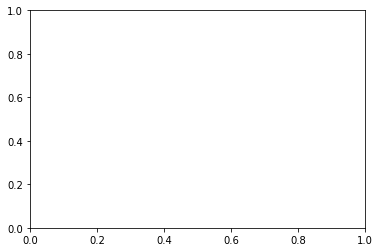

In [77]:
plt.scatter(features[:, 0], features[0:, 1], c=y_test_classes)